# AI예측 해커톤
- 심장 질환 예측

1. train.csv : 학습 데이터
id: 데이터 고유 id
age: 나이
sex: 성별 (여자 = 0, 남자 = 1)
cp: 가슴 통증(chest pain) 종류
0 : asymptomatic 무증상
1 : atypical angina 일반적이지 않은 협심증
2 : non-anginal pain 협심증이 아닌 통증
3 : typical angina 일반적인 협심증
trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
restecg: (resting electrocardiographic) 휴식 중 심전도 결과
0: showing probable or definite left ventricular hypertrophy by Estes' criteria
1: 정상
2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
thalach: (maximum heart rate achieved) 최대 심박수
exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
0: downsloping 하강
1: flat 평탄
2: upsloping 상승
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개)
Null 값은 숫자 4로 인코딩됨
thal: thalassemia 지중해빈혈 여부
0 = Null
1 = normal 정상
2 = fixed defect 고정 결함
3 = reversable defect 가역 결함
target: 심장 질환 진단 여부
0: < 50% diameter narrowing
1: > 50% diameter narrowing


2. test.csv : 테스트 데이터
id: 데이터 고유 id
age: 나이
sex: 성별 (여자 = 0, 남자 = 1)
cp: 가슴 통증(chest pain) 종류
trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
restecg: (resting electrocardiographic) 휴식 중 심전도 결과
thalach: (maximum heart rate achieved) 최대 심박수
exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개)
thal: thalassemia 지중해빈혈 여부


3. sample_submissoin.csv : 제출 양식
id: 데이터 고유 id
target: 심장 질환 진단 여부




### [주제]
심장 질환 유무를 예측하는 AI 알고리즘 개발



### [설명]
환자의 나이, 콜레스테롤 수치 등의 정보를 바탕으로 심장 질환 유무를 예측하는 AI 모델을 개발해야 합니다.

In [19]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/sample_submission.csv')

### 데이터 확인

- 데이터 이상치 확인


In [20]:
train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [21]:
train.shape

(151, 15)

In [22]:
train.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 데이터 시각화


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

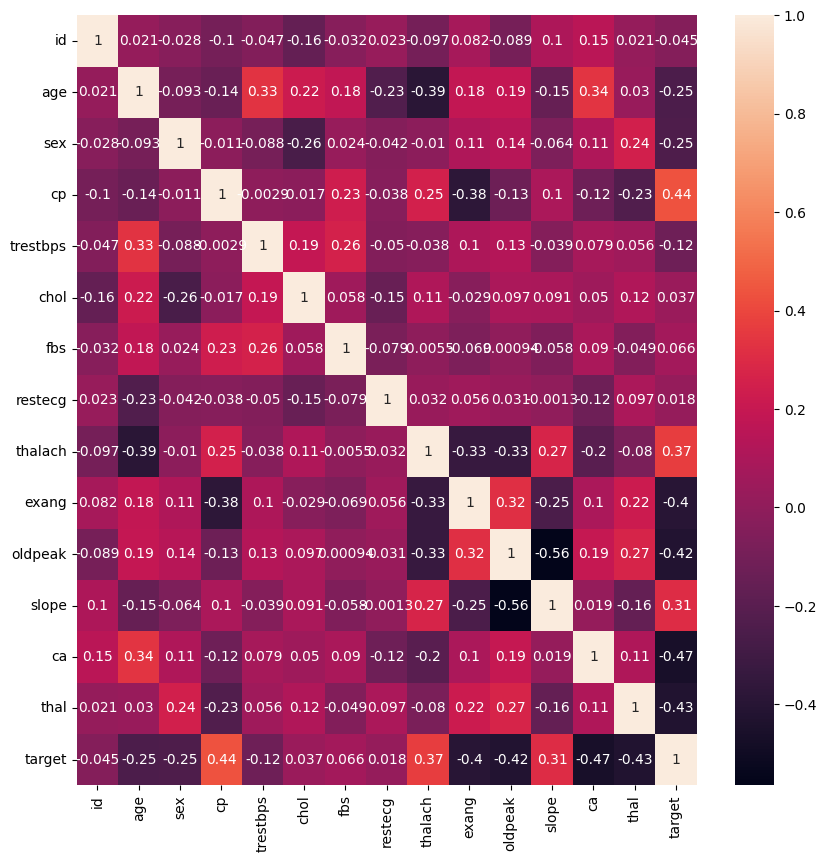

In [24]:
# 각 데이터별 상관관계 히트맵
corrmat = train.corr()
fig = plt.figure(figsize=(10,   10))

sns.heatmap(corrmat, annot=True)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

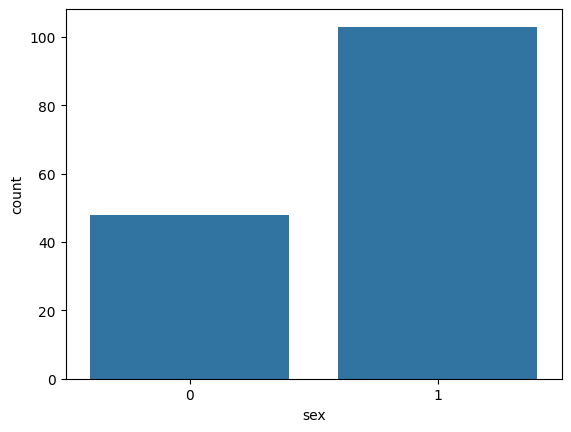

In [25]:
sns.countplot(x='sex', data=train)

In [26]:
train['sex'].value_counts()

sex
1    103
0     48
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='count'>

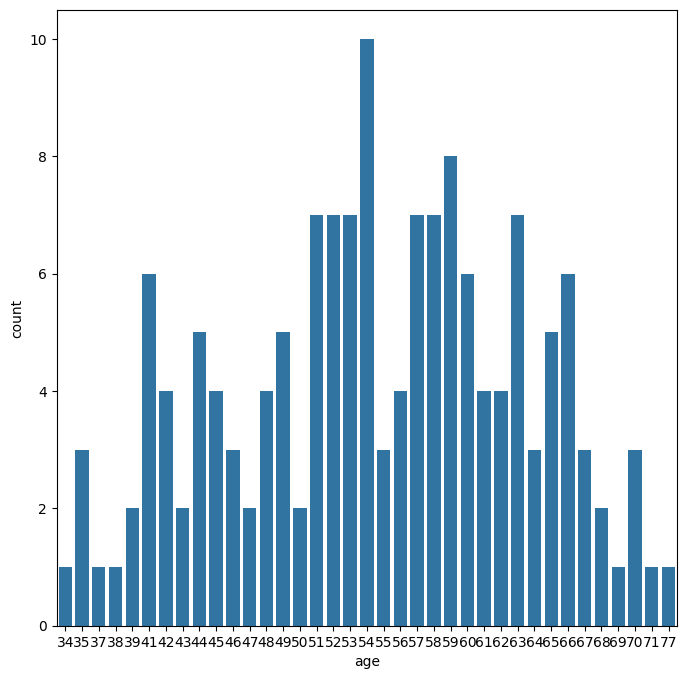

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(x='age', data=train)

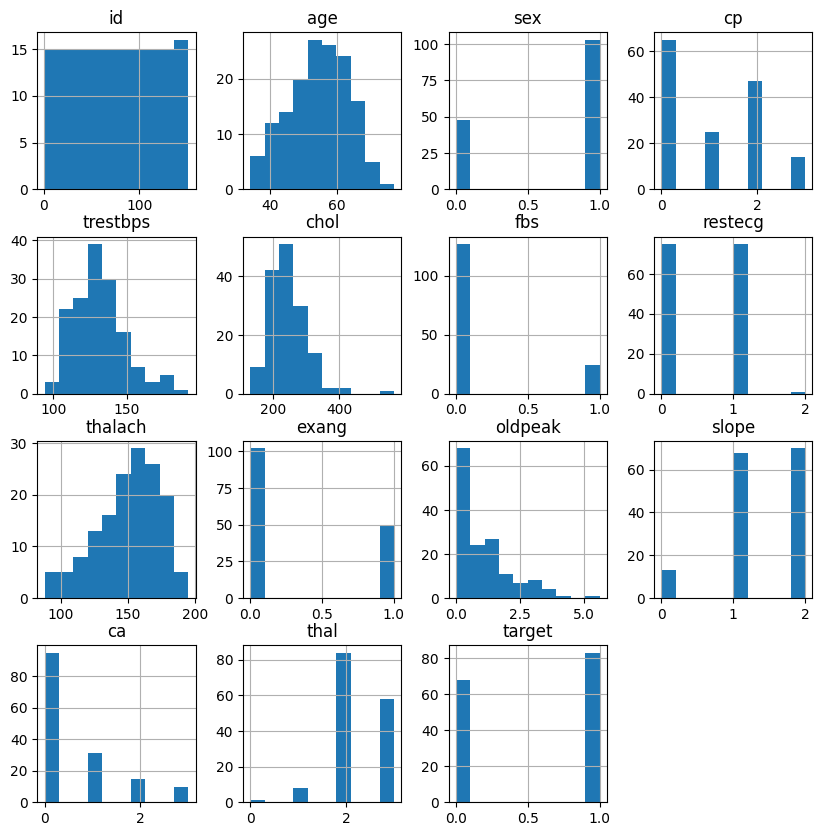

In [30]:
train.hist(figsize=(10,10))
plt.show()

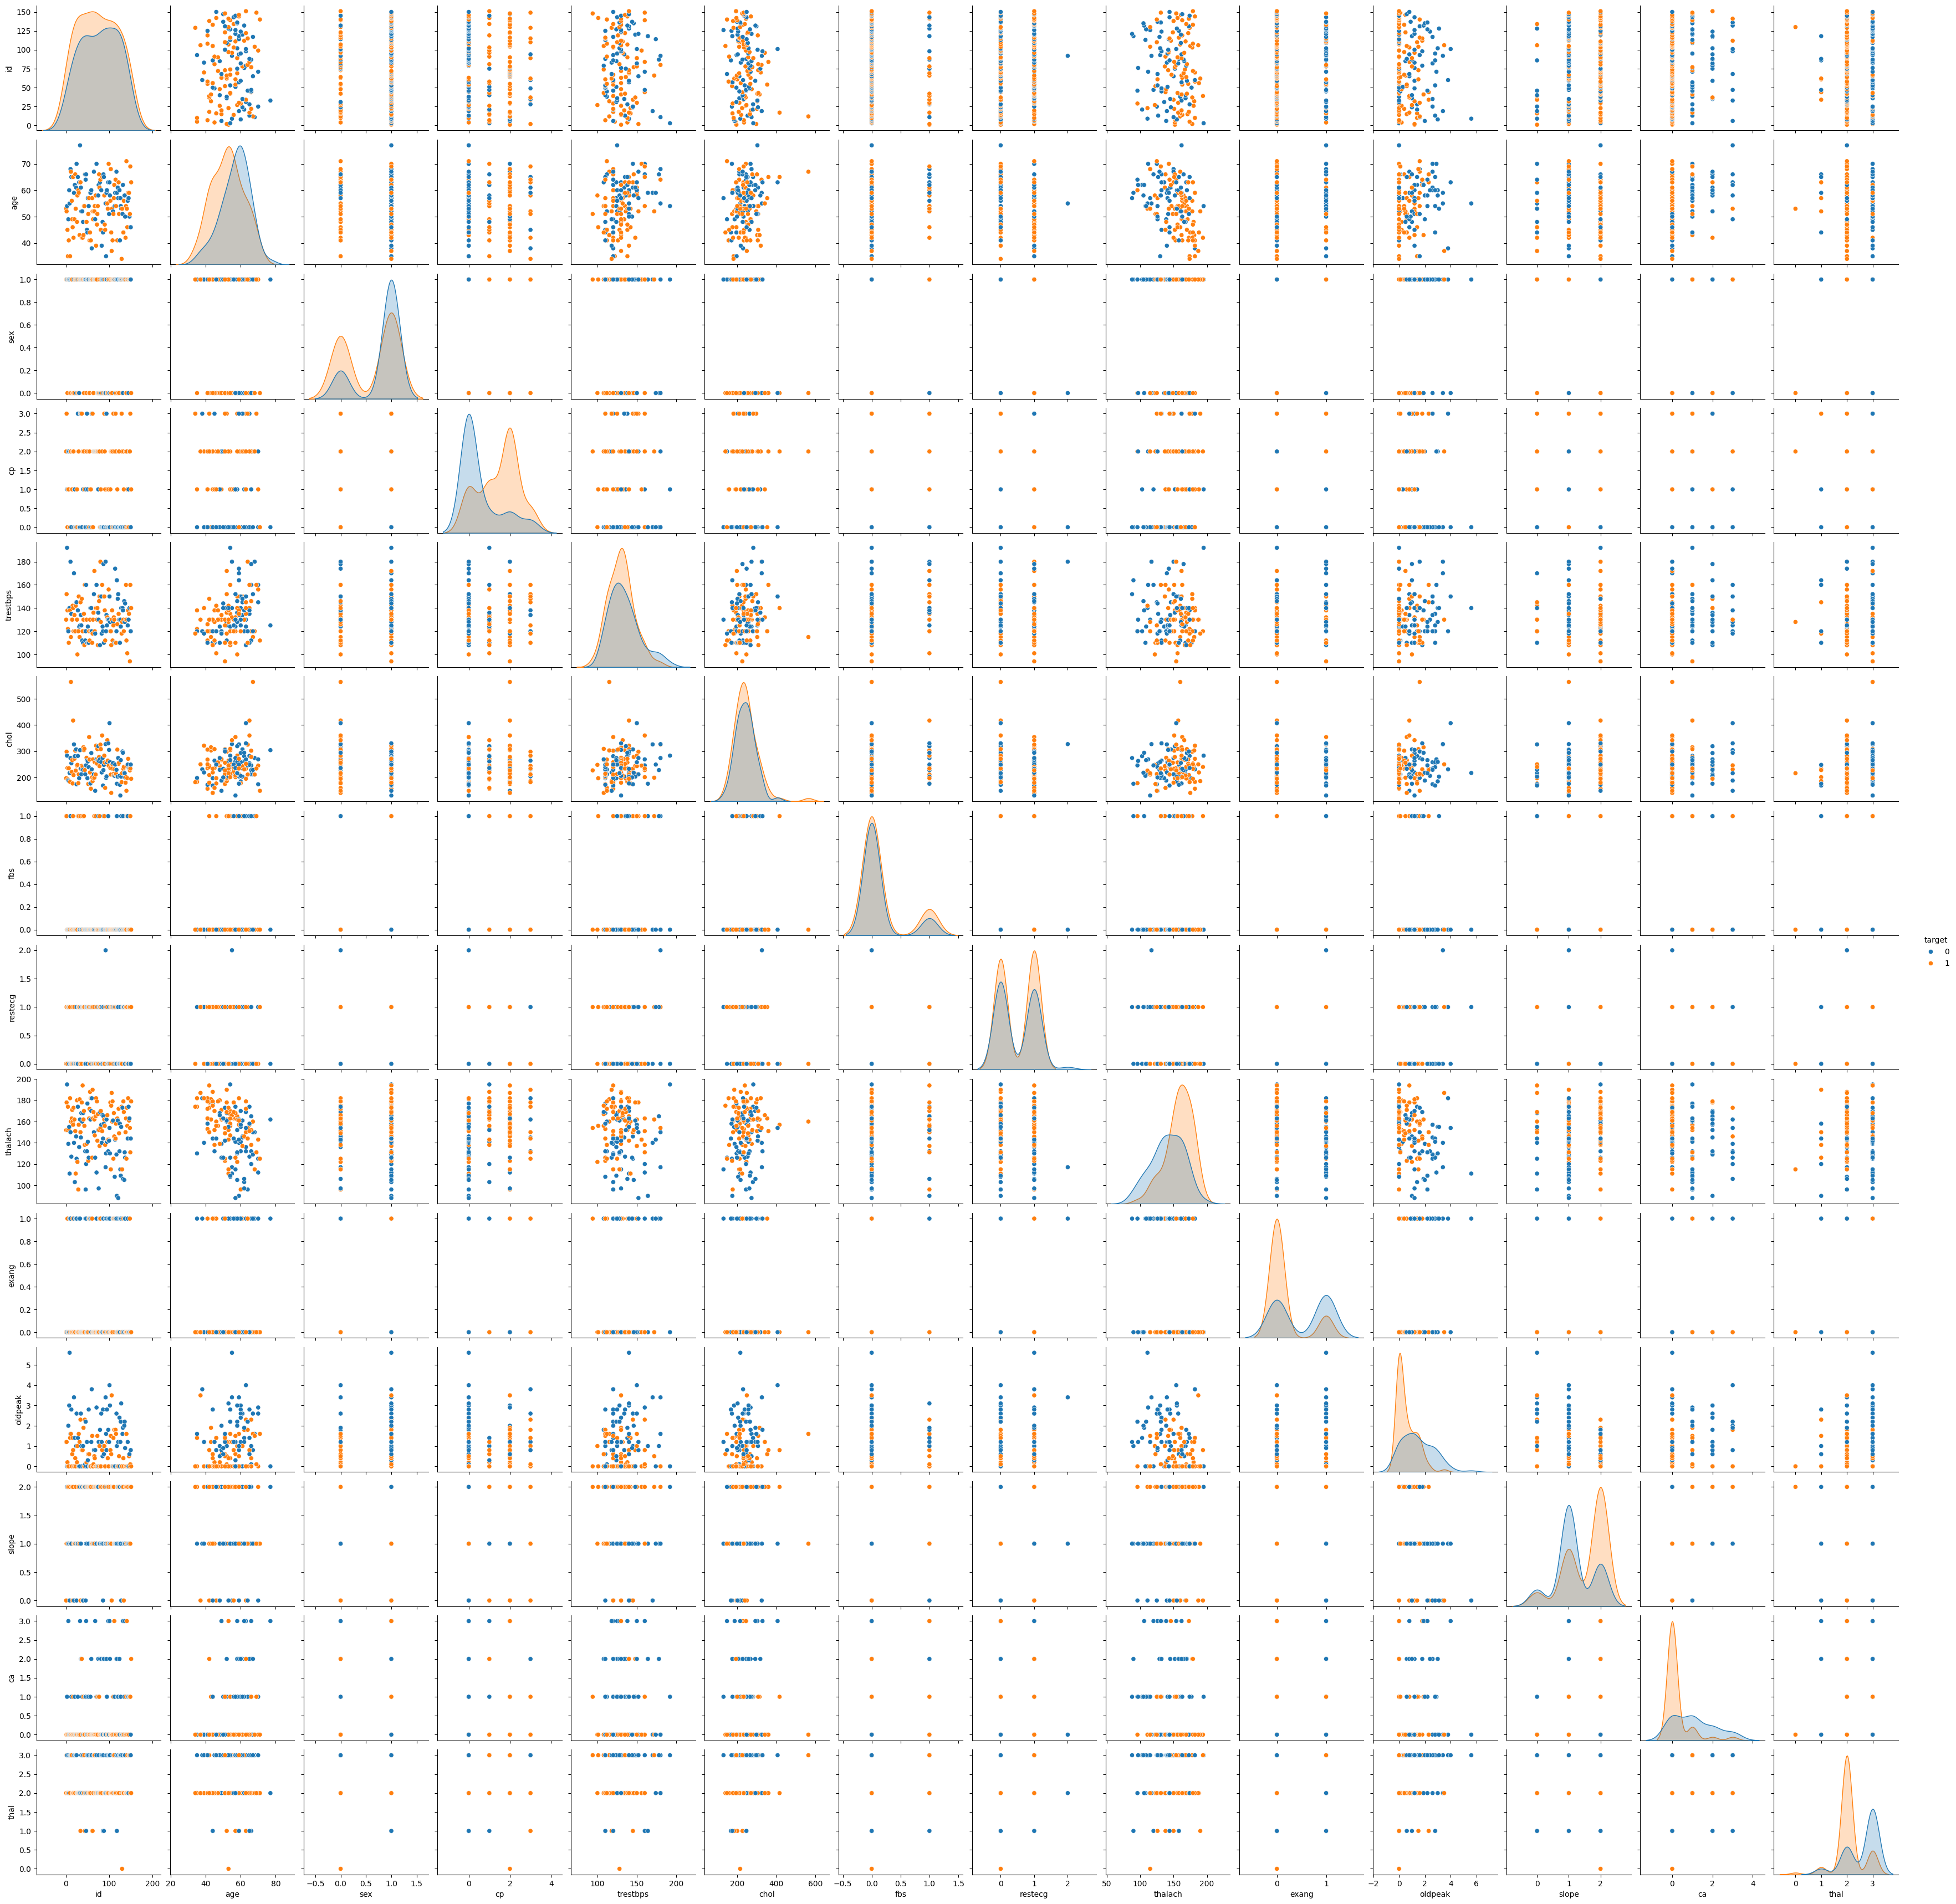

In [31]:
sns.pairplot(train, hue='target')


<Axes: xlabel='age'>

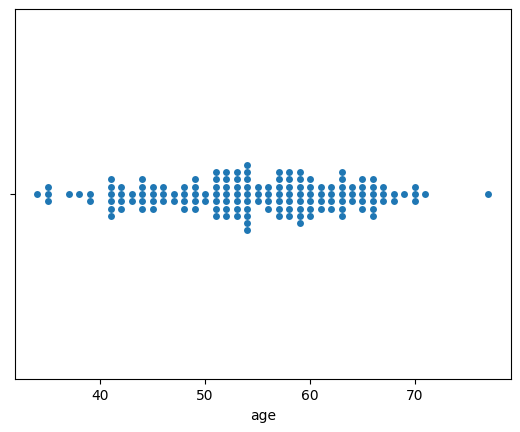

In [35]:
#plt.figure(figsize=(10,10))
sns.swarmplot(x=train['age'])

<Axes: xlabel='age'>

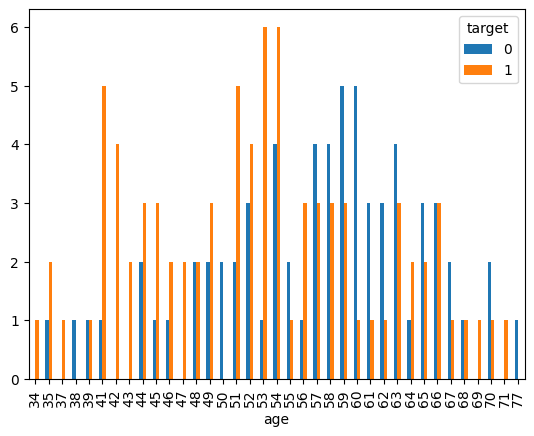

In [36]:
pd.crosstab(train.age, train.target).plot(kind='bar')

<Axes: xlabel='ca'>

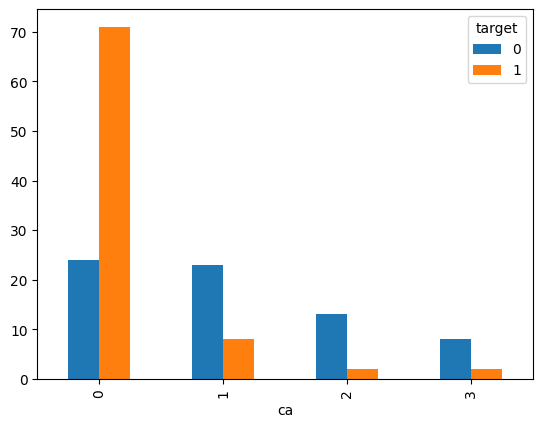

In [37]:
pd.crosstab(train.ca, train.target).plot(kind='bar')

## gridSearchCV

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
dataX = train.drop('target', axis = 1)
dataY = train['target']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42)

In [108]:

import numpy as np
# 하이퍼파라미터 그리드 정의
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = {
    'logistic__C': C,
    'logistic__penalty': penalty
}

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='saga', max_iter=10000))  # 'saga' 솔버 사용
])

In [116]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(max_iter=10000, solver='saga'))])

In [117]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(pipeline, hyperparameters, cv=5, verbose=0)

In [118]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           solver='saga'))]),
             param_grid={'logistic__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2']})

In [119]:
predict = clf.predict(x_test)

In [120]:
accuracy_score(y_test, predict)

0.8387096774193549

In [121]:
clf.best_params_

{'logistic__C': 1.0, 'logistic__penalty': 'l2'}

## KNN 알고리즘

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [124]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
predict = classifier.predict(x_test )
accuracy_score(y_test, predict)

0.45161290322580644

In [126]:
params = { 'n_neighbors' : list(range(1,20)),
                  'p' : [1,2,3,4,5,6,7,8,9,10],
                  'leaf_size' : list(range(1,20)),
                  'weights' : ['uniform','distance'],
  }

In [130]:
knn = KNeighborsClassifier()

In [131]:
KNNModel = GridSearchCV(knn, params, cv=3, n_jobs=-1)

In [132]:
KNNModel.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [133]:
KNNModel.best_params_

{'leaf_size': 1, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [134]:
predict = KNNModel.predict(x_test)
accuracy_score(y_test, predict)

0.5483870967741935

# SVM

In [135]:
from sklearn.svm import SVC

In [139]:
SVC_classifier = SVC(kernel = 'linear', gamma= 10, C=1.0)

In [140]:
SVC_classifier.fit(x_train, y_train)

SVC(gamma=10, kernel='linear')

In [141]:
predict = SVC_classifier.predict(x_test)
accuracy_score(y_test, predict)

0.7741935483870968

## ROC커브 그리기


In [142]:
from sklearn.metrics import roc_curve, roc_auc_score


In [158]:
# 모델 정의
logistic_model = LogisticRegression(solver='saga', max_iter=10000)
KNN_model = GridSearchCV(knn, params, cv=3, n_jobs=-1)
svc_model = SVC(kernel = 'linear', probability=True)  # probability=True 설정

# 모델 학습
logistic_model.fit(x_train, y_train)
KNN_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)


SVC(kernel='linear', probability=True)

In [159]:
# 예측 확률 계산
logistic_probs = clf.predict_proba(x_test)[:, 1]
KNN_probs = KNNModel.predict_proba(x_test)[:, 1]
#SVC_probs = SVC_classifier.predict_proba(x_test)[:, 1]

# ROC Curve 값 계산
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, KNN_probs)
#svm_fpr, svm_tpr, _ = roc_curve(y_test, SVC_probs)

# AUC 계산
logistic_auc = roc_auc_score(y_test, logistic_probs)
rf_auc = roc_auc_score(y_test, KNN_probs)
#svm_auc = roc_auc_score(y_test, SVC_probs)

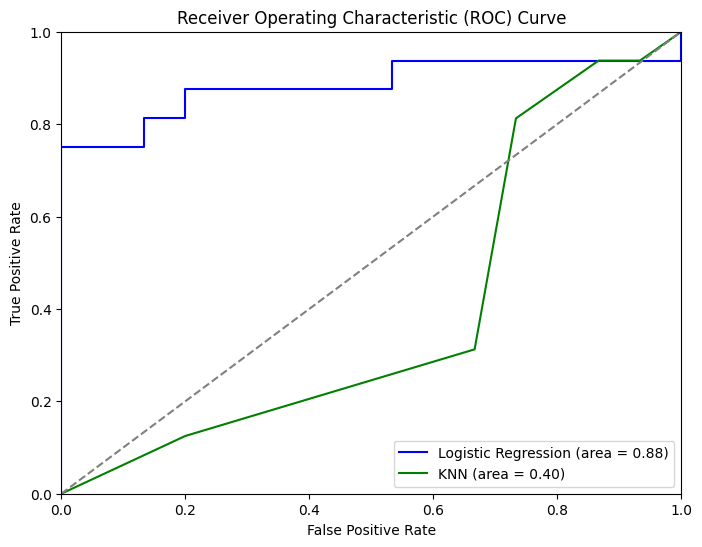

In [161]:
# ROC Curve 그리기
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', label=f'Logistic Regression (area = {logistic_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='green', label=f'KNN (area = {rf_auc:.2f})')
#plt.plot(svm_fpr, svm_tpr, color='red', label=f'SVC (area = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

로지스틱 회귀 모델이 제일 예측도가 높은 결과를 얻었다
